In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# 데이터셋 로드
df = pd.read_csv("../data/processed/db_network_data_table.csv")

# 13.8s

In [2]:
# 결측치 확인
print(f"결측치 개수:\n{df.isnull().sum()}")

# 레이블 컬럼 제거
X = df.drop(columns=['Label'])

# 특성 스케일링: StandardScaler를 사용하여 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 표준화된 데이터 일부 확인
X_scaled[:5]

# 10.5s

결측치 개수:
id                        0
Destination Port          0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Idle Std                  0
Idle Max                  0
Idle Min                  0
Label                     0
source                    0
Length: 81, dtype: int64


array([[-1.73205020e+00,  2.55931236e+00, -4.39346760e-01,
        -9.81916554e-03, -1.04209888e-02, -5.37647159e-02,
        -7.14185443e-03, -2.81099049e-01, -2.10702623e-01,
        -2.80518137e-01, -2.45068686e-01, -4.47423040e-01,
        -5.96108554e-01, -5.05486813e-01, -3.99343192e-01,
         9.68020426e-02,  2.34326639e+00, -2.88035052e-01,
        -3.62828571e-01, -3.75414837e-01, -5.50376549e-02,
        -4.31351040e-01, -2.74014956e-01, -3.38929248e-01,
        -3.68660731e-01, -1.18942869e-01, -3.44293591e-01,
        -2.03189381e-01, -2.36677717e-01, -2.72985658e-01,
        -1.16411542e-01, -2.20700737e-01,  0.00000000e+00,
        -1.05494355e-02,  0.00000000e+00,  1.23676333e-03,
         1.56539147e-03,  2.43519707e+00, -1.83352078e-01,
        -4.13448844e-01, -4.65629149e-01, -5.43204662e-01,
        -4.66881217e-01, -2.95088236e-01, -1.91513432e-01,
        -2.20700737e-01, -1.55691344e-02, -6.51647536e-01,
         1.47177346e+00, -3.23661095e-01, -1.05494355e-0

In [3]:
# IQR을 사용하여 이상치 탐지
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1

# 이상치로 간주되는 값
outliers = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# 이상치 비율 출력
outlier_ratio = np.sum(outliers, axis=0) / X_scaled.shape[0]
print(f"IQR을 기준으로 각 특성의 이상치 비율:\n{outlier_ratio}")

# 이상치가 포함된 데이터 인덱스
outlier_indices = np.where(outliers.any(axis=1))[0]
print(f"이상치가 포함된 데이터 인덱스 수: {len(outlier_indices)}")

# 11.4s


IQR을 기준으로 각 특성의 이상치 비율:
[0.00000000e+00 2.21664065e-01 1.88143537e-01 1.17528508e-01
 1.08908156e-01 1.57899181e-01 2.18686755e-01 2.34642989e-01
 5.28412505e-03 6.64207242e-02 2.34552907e-01 2.25068825e-01
 3.02242203e-02 1.66849481e-01 2.31129778e-01 1.88158374e-01
 1.07286320e-01 2.02609704e-01 2.11785386e-01 1.87708315e-01
 1.80977220e-01 2.35191255e-01 2.37334509e-01 2.33337678e-01
 2.35377072e-01 1.89361592e-01 1.99870847e-01 1.99208830e-01
 2.11765604e-01 2.00867405e-01 1.00661204e-01 4.64464630e-02
 0.00000000e+00 1.11278205e-04 0.00000000e+00 1.37712608e-01
 1.24791265e-01 1.19198034e-01 8.97474621e-02 3.53052185e-03
 2.20401852e-01 1.63487819e-01 1.97729713e-01 2.31226219e-01
 3.53797572e-02 4.64464630e-02 2.42339202e-04 0.00000000e+00
 0.00000000e+00 9.48231613e-02 1.11278205e-04 2.43398995e-04
 9.64199152e-03 1.44737265e-01 6.64207242e-02 1.66849481e-01
 1.37712608e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.17528508e-01


In [4]:
# Z-Score를 사용하여 이상치 탐지
from scipy.stats import zscore

z_scores = np.abs(zscore(X_scaled))

# Z-Score가 3 이상인 값들을 이상치로 간주
outliers_zscore = (z_scores > 3)

# 이상치 비율 출력
outlier_zscore_ratio = np.sum(outliers_zscore, axis=0) / X_scaled.shape[0]
print(f"Z-Score를 기준으로 각 특성의 이상치 비율:\n{outlier_zscore_ratio}")

# 이상치가 포함된 데이터 인덱스
outlier_zscore_indices = np.where(outliers_zscore.any(axis=1))[0]
print(f"Z-Score 이상치가 포함된 데이터 인덱스 수: {len(outlier_zscore_indices)}")

# 3.5s

Z-Score를 기준으로 각 특성의 이상치 비율:
[0.00000000e+00 6.49193516e-03 3.08911830e-02 9.89139600e-05
 9.71476393e-05 1.13503769e-03 8.65497150e-05 1.33908306e-02
 2.91301612e-03 1.21233189e-02 1.17099998e-02 3.01143551e-02
 1.00535442e-02 2.96155462e-02 2.94240770e-02 2.01996437e-03
 1.54683770e-02 1.36208056e-02 3.64346039e-02 5.88566323e-02
 2.83494475e-03 3.57425595e-02 1.44375523e-02 5.01854107e-02
 5.90134816e-02 1.33456128e-02 5.78689058e-02 1.45290477e-02
 2.82551260e-02 4.46515279e-02 1.31816982e-02 4.64464630e-02
 0.00000000e+00 1.11278205e-04 0.00000000e+00 1.20109809e-05
 1.94295279e-05 1.46986145e-02 5.85535317e-03 3.31962315e-03
 3.32516940e-02 2.94198378e-02 2.80802602e-02 2.39110368e-02
 3.53797572e-02 4.64464630e-02 2.42339202e-04 0.00000000e+00
 0.00000000e+00 9.48231613e-02 1.11278205e-04 2.43398995e-04
 9.64199152e-03 3.00278054e-02 1.21233189e-02 2.96155462e-02
 1.20109809e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.89139600e

In [5]:
# Isolation Forest를 사용하여 이상치 탐지
iso_forest = IsolationForest(contamination=0.05, random_state=42)
y_iso_forest = iso_forest.fit_predict(X_scaled)

# -1은 이상치를 나타내고, 1은 정상 값을 나타냄
outliers_iso_forest = y_iso_forest == -1

# 이상치 비율 출력
outlier_iso_forest_ratio = np.sum(outliers_iso_forest) / X_scaled.shape[0]
print(f"Isolation Forest를 기준으로 이상치 비율: {outlier_iso_forest_ratio}")

# 이상치가 포함된 데이터 인덱스
outlier_iso_forest_indices = np.where(outliers_iso_forest)[0]
print(f"Isolation Forest 이상치가 포함된 데이터 인덱스 수: {len(outlier_iso_forest_indices)}")

# 22.5s


Isolation Forest를 기준으로 이상치 비율: 0.04999994701037855
Isolation Forest 이상치가 포함된 데이터 인덱스 수: 141537


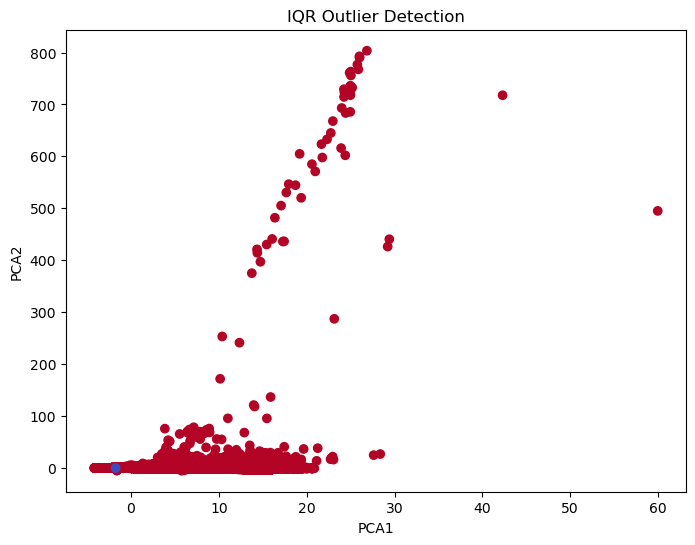

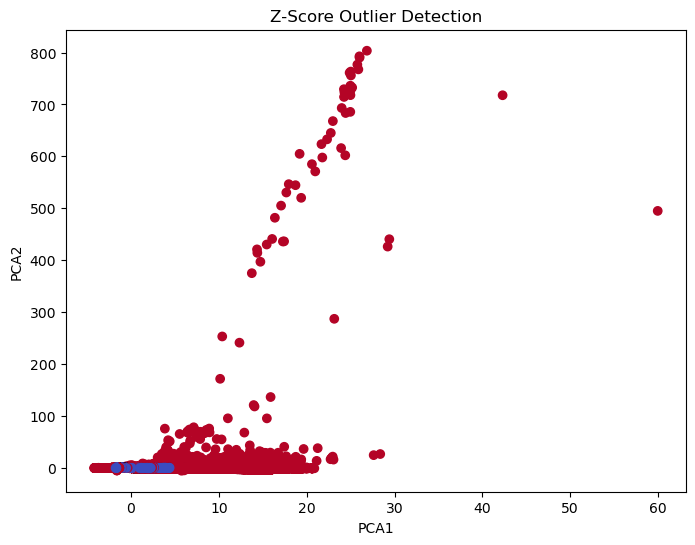

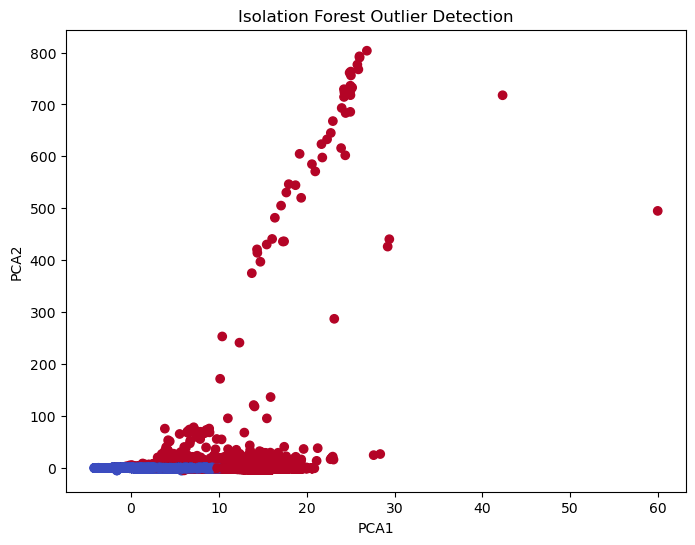

In [6]:
# PCA로 2D로 차원 축소하여 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# IQR 방법을 사용한 이상치 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers.any(axis=1), cmap='coolwarm', label='IQR Outliers')
plt.title('IQR Outlier Detection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Z-Score 방법을 사용한 이상치 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_zscore.any(axis=1), cmap='coolwarm', label='Z-Score Outliers')
plt.title('Z-Score Outlier Detection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Isolation Forest 방법을 사용한 이상치 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_iso_forest, cmap='coolwarm', label='Isolation Forest Outliers')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 1m21.7s
